In [1]:
# similar to the previous notebook, this notebook will outline the construction of a classifier that uses a decision tree to identfy heart disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [2]:
# import data
df = pd.read_csv('heart_data.csv')

# map FastingBS into qualitative labels for dummy variable transformation later
df['FastingBS'] = df['FastingBS'].map({0:'Under120', 1:'Over120'})

# split into male and female data sets
df_male = df.loc[df['Sex'] == 'M']
df_male_dummy = pd.get_dummies(df_male).drop('Sex_M', axis=1)

df_female = df.loc[df['Sex'] == 'F']
df_female_dummy = pd.get_dummies(df_female).drop('Sex_F', axis=1)

# make X and y for male and female 
X_male = df_male_dummy.drop('HeartDisease', axis=1)
y_male = df_male_dummy.loc[:, 'HeartDisease']

X_fem = df_female_dummy.drop('HeartDisease', axis=1)
y_fem = df_female_dummy.loc[:, 'HeartDisease']

# train test split for males
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_male, y_male,
                                                           test_size=0.2,
                                                           random_state=42,
                                                           stratify=y_male)

# # train test split for femalaes
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fem, y_fem,
                                                           test_size=0.2,
                                                           random_state=42,
                                                           stratify=y_fem)

In [3]:
# decision tree for males
male_dt = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train_m, y_train_m)
male_dt.score(X_test_m, y_test_m)

0.8758620689655172

In [4]:
# confusion matrix for male
confusion_matrix(y_test_m, male_dt.predict(X_test_m))

array([[41, 12],
       [ 6, 86]])

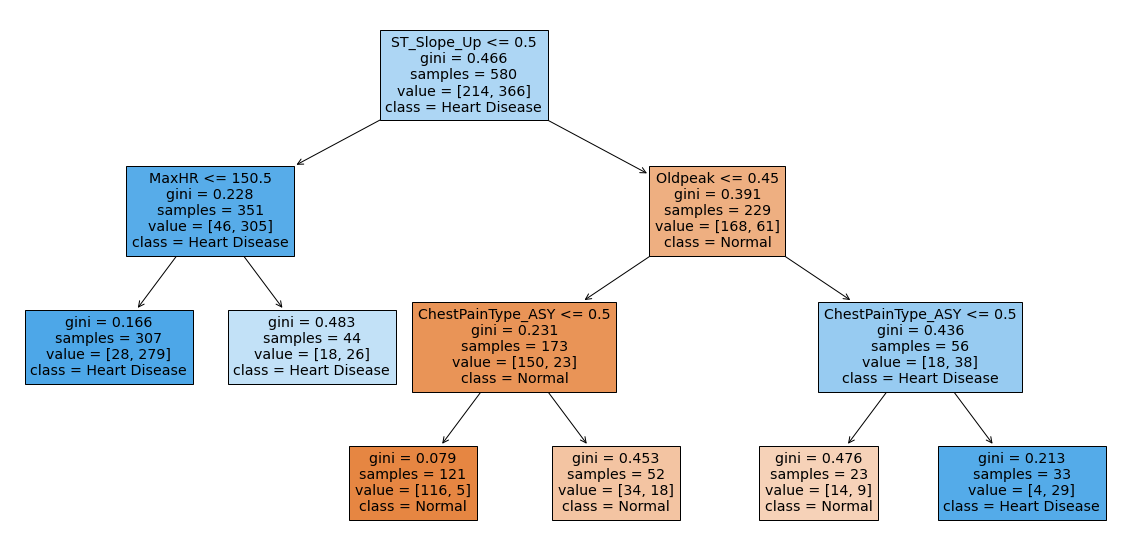

In [5]:
# male tree plot
plt.figure(figsize=(20,10))
tree.plot_tree(male_dt.fit(X_train_m, y_train_m), feature_names=X_train_m.columns, filled=True, class_names=['Normal', 'Heart Disease'])
plt.show()

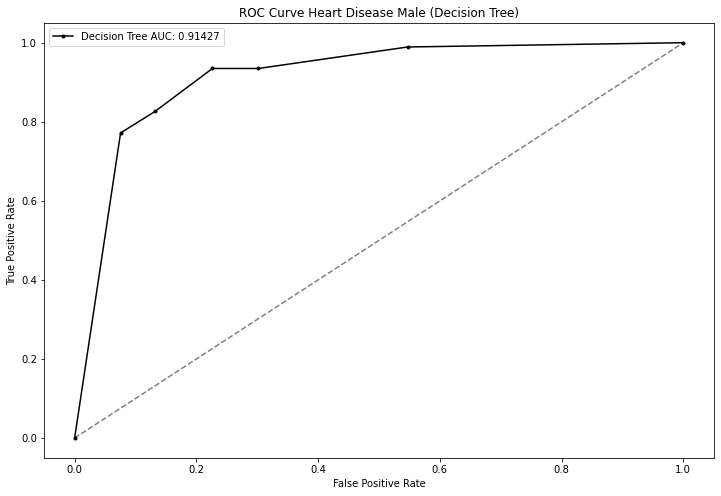

In [6]:
# male ROC curve
male_prob_col = male_dt.predict_proba(X_test_m)[:,1]
ns_fpr_m, ns_tpr_m, _ = roc_curve(y_test_m, [0 for _ in range(len(y_test_m))])
lr_fpr_m, lr_tpr_m, _ = roc_curve(y_test_m, male_prob_col)


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ns_fpr_m, ns_tpr_m, linestyle='dashed', color='grey')
ax.plot(lr_fpr_m, lr_tpr_m, marker='.', label='Decision Tree AUC: ' + str(round(roc_auc_score(y_test_m, male_dt.predict_proba(X_test_m)[:,1]), 5)), color='black')
ax.set_title('ROC Curve Heart Disease Male (Decision Tree)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

plt.show()

In [7]:
str(round(roc_auc_score(y_test_m, male_dt.predict_proba(X_test_m)[:,1]), 5))

'0.91427'

In [8]:
# female model
fem_dt = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train_f, y_train_f)
fem_dt.score(X_test_f, y_test_f)

0.9230769230769231

In [9]:
# confusion matrix for female
confusion_matrix(y_test_f, male_dt.predict(X_test_f))

array([[20,  9],
       [ 0, 10]])

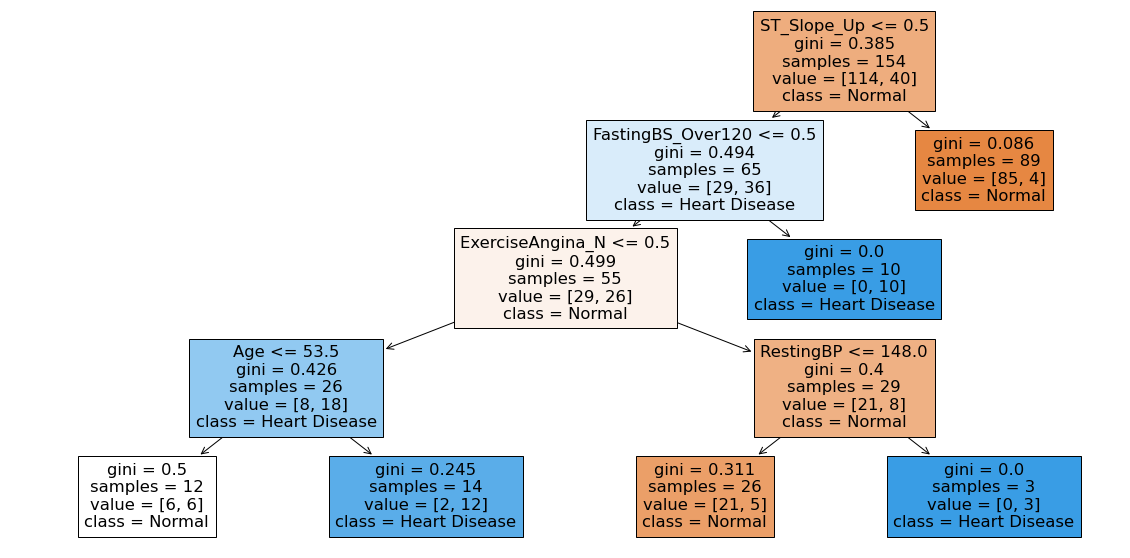

In [10]:
# female tree plot
plt.figure(figsize=(20,10))
tree.plot_tree(fem_dt.fit(X_train_f, y_train_f), feature_names=X_train_f.columns, filled=True, class_names=['Normal', 'Heart Disease'])
plt.show()

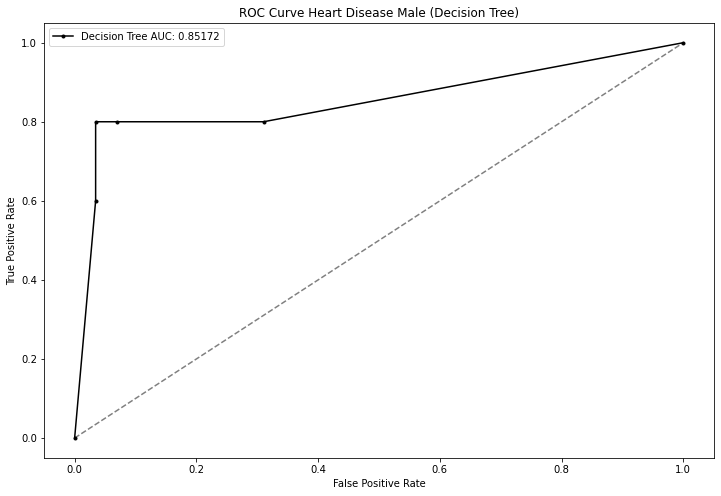

In [11]:
# male ROC curve
fem_prob_col = fem_dt.predict_proba(X_test_f)[:,1]
ns_fpr_f, ns_tpr_f, _ = roc_curve(y_test_f, [0 for _ in range(len(y_test_f))])
lr_fpr_f, lr_tpr_f, _ = roc_curve(y_test_f, fem_prob_col)


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ns_fpr_f, ns_tpr_f, linestyle='dashed', color='grey')
ax.plot(lr_fpr_f, lr_tpr_f, marker='.', label='Decision Tree AUC: ' + str(round(roc_auc_score(y_test_f, fem_dt.predict_proba(X_test_f)[:,1]), 5)), color='black')
ax.set_title('ROC Curve Heart Disease Male (Decision Tree)')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

plt.show()

In [12]:
str(round(roc_auc_score(y_test_f, fem_dt.predict_proba(X_test_f)[:,1]), 5))

'0.85172'